In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model  import RidgeCV,Ridge,LassoCV,Lasso,ElasticNetCV,ElasticNet

import pickle

In [3]:
df = pd.read_csv('Admission_Prediction.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
df['GRE Score'].fillna(df['GRE Score'].mean(),inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(),inplace=True)
df['University Rating'].fillna(df['University Rating'].mode()[0],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    float64
 2   TOEFL Score        500 non-null    float64
 3   University Rating  500 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [9]:
df.drop('Serial No.',inplace=True,axis=1)

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

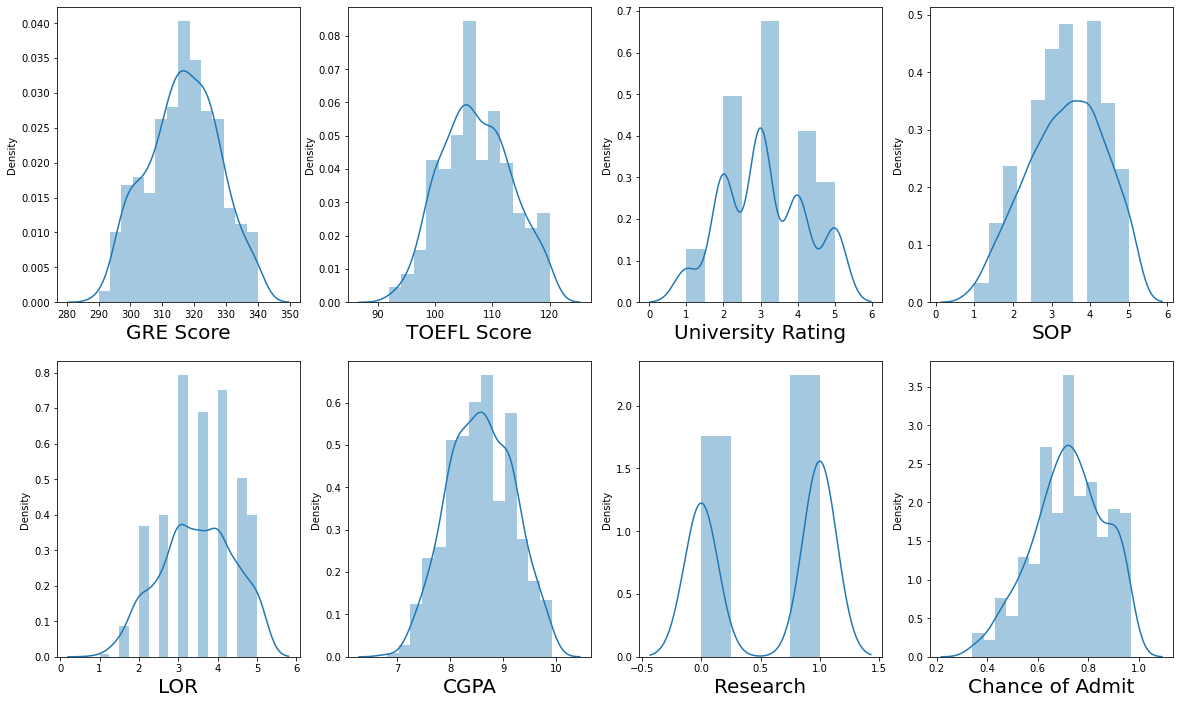

In [11]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1

In [12]:
x = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']

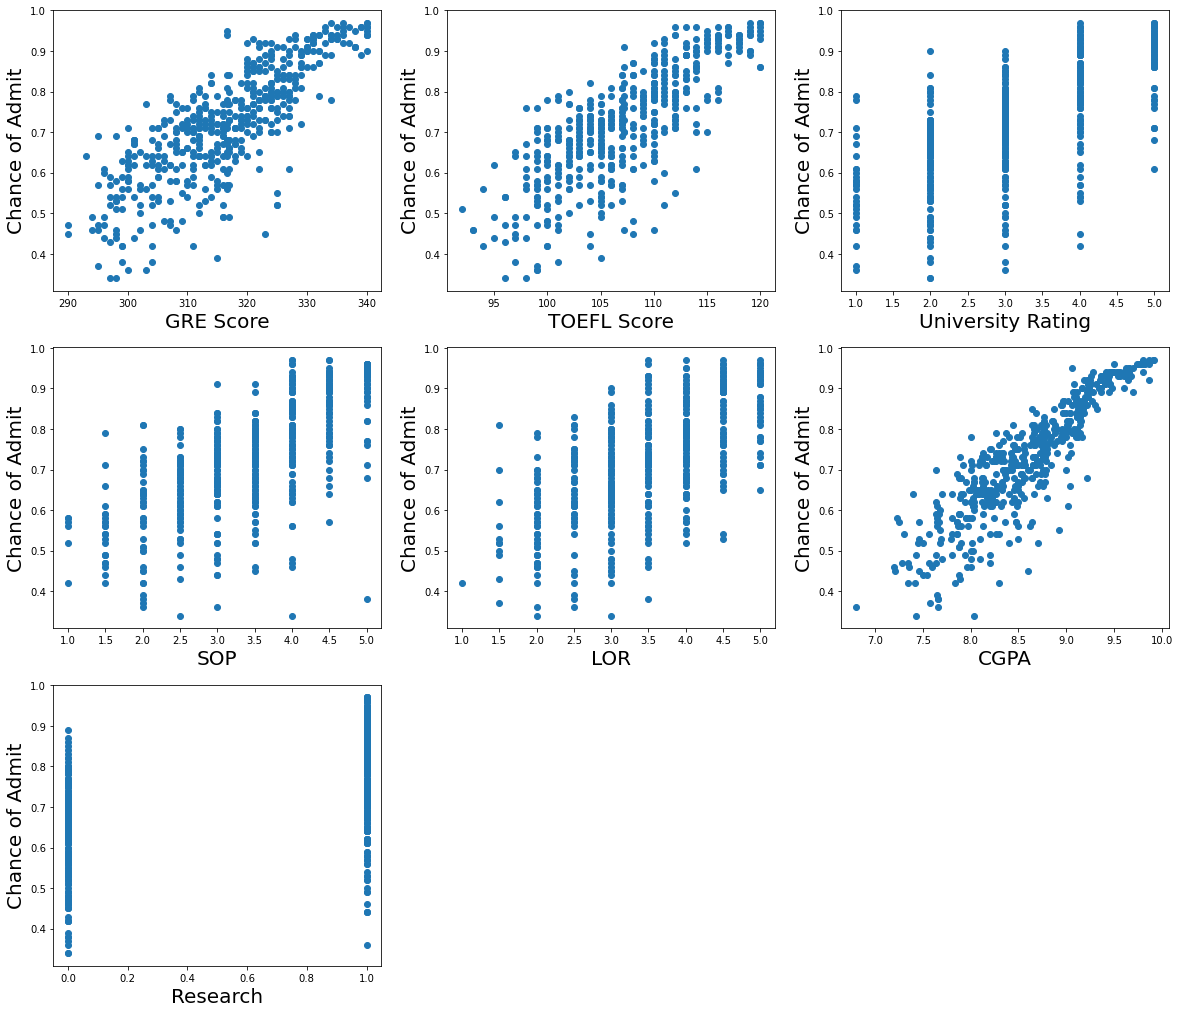

In [13]:
plt.figure(figsize=(20,30))
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1

In [14]:
ss = StandardScaler()
x_scaled = ss.fit_transform(x)

In [15]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [16]:
variables = x_scaled
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['Features']=x.columns
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [18]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
r2_score(y_test,y_predict)

0.7534898831471066

In [19]:
lr.predict(ss.transform([[337,118,4,4,4,9,1]]))

array([0.86300757])

In [20]:
filename = "admission_prediction_zcoer.pickle"
pickle.dump(lr,open(filename,'wb'))

In [21]:
loaded_model = pickle.load(open('admission_prediction_zcoer.pickle','rb'))
y_predict = loaded_model.predict(ss.transform([[337,118,4,4,4,9,1]]))
y_predict

array([0.86300757])

In [22]:
lr.score(x_train,y_train)

0.8415250484247909

#### Lasso Regularization

In [23]:
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [24]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

3.0341655445178153e-05

In [25]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05)

In [26]:
lasso_reg.score(x_test, y_test)

0.7534654960492284

In [27]:
#our r2_score for test data (75.34%) comes same as before using regularization. 
#So, it is fair to say our OLS model did not overfit the data.

#### Ridge Regularization

In [28]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

a = np.random.uniform(0,10,50)
ridgecv = RidgeCV(alphas = a,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([5.43959695, 5.39304323, 0.83814796, 9.3979736 , 7.56664337,
       0.01607585, 4.44001843, 4.10487713, 4.5939089 , 1.76578178,
       2.88544549, 9.19642419, 1.70078707, 8.62791279, 1.71764748,
       3.8804266 , 2.53332582, 1.89063488, 1.69434437, 1.60048533,
       5.06185582, 6.04293958, 7.13373391, 4.3303744 , 6.4599785 ,
       7.2356534 , 4.86158186, 4.94919387, 3.42350141, 7.16330578,
       2.53686306, 9.1856117 , 3.73973746, 5.29957657, 6.47462405,
       2.43843746, 2.14043372, 3.34110733, 3.43365532, 7.56598455,
       8.54118633, 5.67283283, 8.56778055, 2.38779486, 5.3588899 ,
       0.43410935, 7.47049265, 4.08338555, 1.05619749, 9.39553243]),
        cv=10, normalize=True)

In [29]:
ridgecv.alpha_

0.016075847673902022

In [30]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.016075847673902022)

In [31]:
ridge_model.score(x_test, y_test)
#we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

0.753497778968267

#### ElasticNet Regularization

In [32]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [33]:
elasticCV.alpha_

0.0011069728449315508

In [34]:
elasticCV.l1_ratio

0.5

In [35]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_, l1_ratio = 0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508)

In [36]:
elasticnet_reg.score(x_test, y_test)

0.7531695370639867